In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_json('../input/tweets-during-r-madrid-vs-liverpool-ucl-2018/TweetsChampions.json', lines = True)

**Get top 5 rows from dataframe**

In [6]:
data.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,retweeted_status,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,limit,withheld_in_countries
0,2018-05-26 13:18:30+00:00,1.000366e+18,1.000366e+18,MATCH-DAY\n\nReal Madrid vs Liverpool\n\n#UCLF...,"[0, 101]","<a href=""http://www.hootsuite.com"" rel=""nofoll...",0.0,NaN,NaN,NaN,...,en,2018-05-26 13:18:30.859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-26 13:18:31+00:00,1.000366e+18,1.000366e+18,RT @panditfootball: [VIDEO] Siapa yang punya p...,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,NaN,NaN,NaN,...,in,2018-05-26 13:18:31.053,{'created_at': 'Sat May 26 13:16:44 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-26 13:18:31+00:00,1.000366e+18,1.000366e+18,RT @madridismoreaI_: HA LLEGADO EL DÍA ⚽️\n\nH...,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,NaN,NaN,NaN,...,es,2018-05-26 13:18:31.084,{'created_at': 'Sat May 26 11:28:58 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-26 13:18:31+00:00,1.000366e+18,1.000366e+18,RT @madridismoreaI_: Mi XI para mañana: Navas...,NaN,"<a href=""http://twitter.com/"" rel=""nofollow"">M...",0.0,NaN,NaN,NaN,...,es,2018-05-26 13:18:31.093,{'created_at': 'Fri May 25 15:04:21 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-26 13:18:31+00:00,1.000366e+18,1.000366e+18,RT @ECG_Unofficial: We will like to categorica...,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,NaN,NaN,NaN,...,en,2018-05-26 13:18:31.131,{'created_at': 'Sat May 26 11:14:44 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


![](http://)**Get the column names, types and counts**

In [7]:
pd.concat([data.count().sort_index(), data.dtypes.sort_index()], axis=1, join='inner')

,0,1
contributors,0,float64
coordinates,56,object
created_at,330384,"datetime64[ns, UTC]"
display_text_range,40337,object
entities,330384,object
extended_entities,113089,object
extended_tweet,14013,object
favorite_count,330384,float64
favorited,330384,float64
filter_level,330384,object


In [8]:
data['created_at'].min()

Timestamp('2018-05-26 13:18:30+0000', tz='UTC')

In [9]:
data['created_at'].max()

Timestamp('2018-05-26 20:45:51+0000', tz='UTC')

**Explore geographical fields**

In [ ]:
data[pd.notna(data['place'])]['place']
data['place'][114]

**Unique Languages**

In [10]:
data.groupby('lang')['id'].nunique().sort_index()

lang
am          1
ar      10655
bg         17
bn         10
ca        749
ckb         2
cs        183
cy        203
da        135
de       5761
el       2101
en     187592
es      47923
et        742
eu        116
fa        591
fi        183
fr       8301
hi        313
ht       1130
hu         92
hy          2
in       7735
is         43
it       6343
iw         14
ja       3392
ko         29
lt       1180
lv         65
ml         33
mr          2
ne         34
nl        731
no        156
pl       1309
pt      15843
ro        166
ru        683
si          2
sl         84
sr         25
sv        176
ta         18
th       3513
tl       1815
tr       4345
uk        183
und     14978
ur         48
vi         16
zh         22
Name: id, dtype: int64

In [11]:
data_en = data[data['lang']=='en']

In [12]:
data_en.count()

created_at                   188087
id                           188087
id_str                       188087
text                         188087
display_text_range            17093
source                       188087
truncated                    188087
in_reply_to_status_id          1866
in_reply_to_status_id_str      1866
in_reply_to_user_id            3054
in_reply_to_user_id_str        3054
in_reply_to_screen_name        3054
user                         188087
geo                              22
coordinates                      22
place                          4876
contributors                      0
is_quote_status              188087
quote_count                  188087
reply_count                  188087
retweet_count                188087
favorite_count               188087
entities                     188087
extended_entities             73529
favorited                    188087
retweeted                    188087
possibly_sensitive            92297
filter_level                

In [13]:
data_en.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,retweeted_status,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,limit,withheld_in_countries
0,2018-05-26 13:18:30+00:00,1.000366e+18,1.000366e+18,MATCH-DAY\n\nReal Madrid vs Liverpool\n\n#UCLF...,"[0, 101]","<a href=""http://www.hootsuite.com"" rel=""nofoll...",0.0,NaN,NaN,NaN,...,en,2018-05-26 13:18:30.859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-26 13:18:31+00:00,1.000366e+18,1.000366e+18,RT @ECG_Unofficial: We will like to categorica...,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,NaN,NaN,NaN,...,en,2018-05-26 13:18:31.131,{'created_at': 'Sat May 26 11:14:44 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-26 13:18:31+00:00,1.000366e+18,1.000366e+18,Real Madrid.... LETS GO!!!!!!!!!!!!!!!!!!!!!!!...,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1.0,NaN,NaN,NaN,...,en,2018-05-26 13:18:31.194,NaN,{'full_text': 'Real Madrid.... LETS GO!!!!!!!!...,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-26 13:18:31+00:00,1.000366e+18,1.000366e+18,RT @YNWA_Claire: Please? 🙏🏼\n\n#UCLFinal https...,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,NaN,NaN,NaN,...,en,2018-05-26 13:18:31.283,{'created_at': 'Sat May 26 13:13:45 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-05-26 13:18:31+00:00,1.000366e+18,1.000366e+18,RT @ChampionsLeague: Two European giants go he...,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,NaN,NaN,NaN,...,en,2018-05-26 13:18:31.321,{'created_at': 'Sat May 26 13:00:01 +0000 2018...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Time series**

In [87]:
#tweets_per_minute = data_en.groupby([data_en.created_at.dt.hour, data_en.created_at.dt.minute]).id.count()
data_en['created-at-hour-minute'] = pd.to_datetime(data_en['created_at'], format='%H%M%S').dt.floor('T')

In [108]:
data_en = data_en.sort_values('created_at', ascending=True)

timeseries = data_en[data_en['created-at-hour-minute']>='2018-05-26 18:46:00+00:00'].groupby([data_en['created-at-hour-minute']]).id.count()

(array([736840.78125   , 736840.79166667, 736840.80208333, 736840.8125    ,
        736840.82291667, 736840.83333333, 736840.84375   , 736840.85416667,
        736840.86458333]),
 <a list of 9 Text major ticklabel objects>)

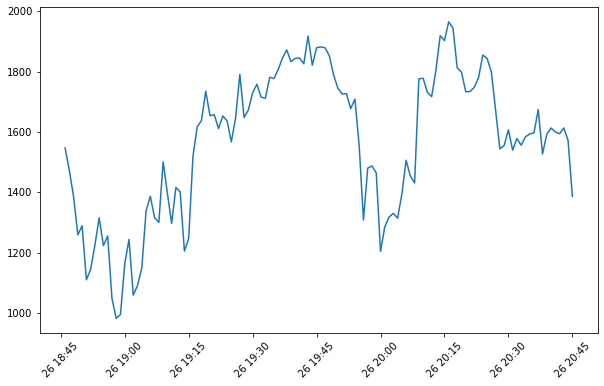

In [124]:
#plt.plot(timeseries)
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.plot(timeseries.index, timeseries.values)
plt.xticks(rotation=45)